# Bollinger Bands

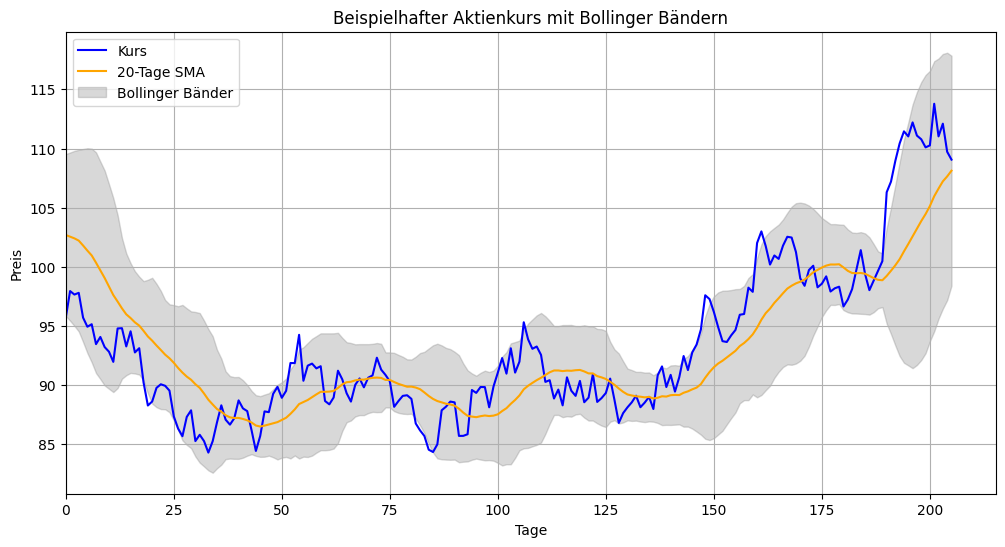

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulierte Aktienkurs-Daten generieren
SEED = 42

np.random.seed(SEED)
n_days = 225
trend = np.linspace(0, 10, n_days)  # Leichter Aufwärtstrend
noise = np.random.normal(0, 1.5, n_days)  # Zufällige Schwankungen
price = 100 + trend + np.cumsum(noise)  # Startwert 100 mit kumuliertem Rauschen

# Bollinger Bands berechnen
window = 20  # 20-Tage SMA
df = pd.DataFrame(price, columns=['Close'])
df['SMA'] = df['Close'].rolling(window=window).mean()
df['StdDev'] = df['Close'].rolling(window=window).std()
df['Upper Band'] = df['SMA'] + 2 * df['StdDev']
df['Lower Band'] = df['SMA'] - 2 * df['StdDev']

# NaN-Werte entfernen und Index zurücksetzen
df = df.dropna().reset_index(drop=True)

# Plot erstellen
plt.figure(figsize=(12, 6))

# Linien für den Aktienkurs und den SMA
plt.plot(df.index, df['Close'], label='Kurs', color='blue', linewidth=1.5)
plt.plot(df.index, df['SMA'], label='20-Tage SMA', color='orange', linewidth=1.5)

# Bollinger Bänder mit direkter Datenumwandlung in NumPy-Arrays zur Sicherstellung der Kompatibilität
plt.fill_between(df.index, df['Upper Band'].values, df['Lower Band'].values, 
                 color='gray', alpha=0.3, label='Bollinger Bänder')

# Titel und Achsenbeschriftungen
plt.title('Beispielhafter Aktienkurs mit Bollinger Bändern')
plt.xlabel('Tage')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)

# X-Achse anpassen, sodass Tag 0 mit der Y-Achse beginnt
plt.xlim(left=0)

# Plot anzeigen
plt.show()

# 50 vs. 200 SMA (Ohne Kaufsingale)

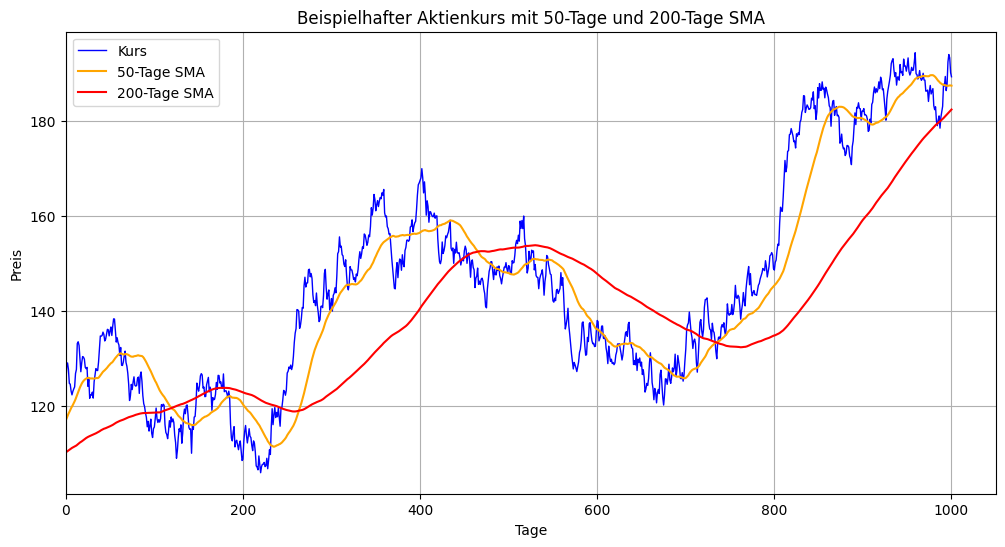

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulierte Aktienkurs-Daten generieren (1000 Tage)
SEED = 43

np.random.seed(SEED)
n_days = 1200
trend = np.linspace(0, 50, n_days)  # Langfristiger Aufwärtstrend
noise = np.random.normal(0, 2, n_days)  # Zufällige Schwankungen
price = 100 + trend + np.cumsum(noise)  # Startwert 100 mit kumuliertem Rauschen

# SMA 50 und SMA 200 berechnen
df = pd.DataFrame(price, columns=['Close'])
df['SMA 50'] = df['Close'].rolling(window=50).mean()
df['SMA 200'] = df['Close'].rolling(window=200).mean()

# NaN-Werte entfernen, die durch das Rolling Window entstehen
df = df.dropna().reset_index(drop=True)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Close'], label='Kurs', color='blue', linewidth=1)
plt.plot(df.index, df['SMA 50'], label='50-Tage SMA', color='orange', linewidth=1.5)
plt.plot(df.index, df['SMA 200'], label='200-Tage SMA', color='red', linewidth=1.5)

# Titel und Achsenbeschriftungen
plt.title('Beispielhafter Aktienkurs mit 50-Tage und 200-Tage SMA')
plt.xlabel('Tage')
plt.ylabel('Preis')
plt.legend()
plt.grid(True)

# X-Achse anpassen, sodass Tag 0 mit der Y-Achse beginnt
plt.xlim(left=0)

# Plot anzeigen
plt.show()


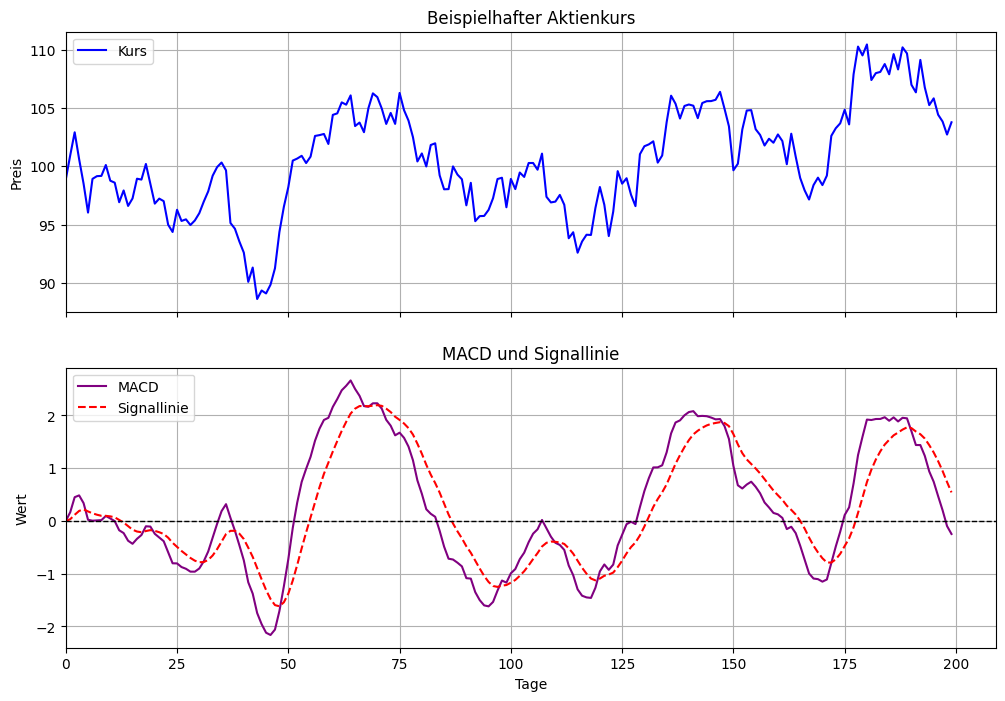

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulierte Aktienkurs-Daten generieren (500 Tage)
SEED = 44

np.random.seed(SEED)
n_days = 200
trend = np.linspace(0, 20, n_days)  # Langfristiger Aufwärtstrend
noise = np.random.normal(0, 1.5, n_days)  # Zufällige Schwankungen
price = 100 + trend + np.cumsum(noise)  # Startwert 100 mit kumuliertem Rauschen

# DataFrame erstellen
df = pd.DataFrame(price, columns=['Close'])

# MACD berechnen
short_window = 12
long_window = 26
signal_window = 9

df['EMA 12'] = df['Close'].ewm(span=short_window, adjust=False).mean()
df['EMA 26'] = df['Close'].ewm(span=long_window, adjust=False).mean()
df['MACD'] = df['EMA 12'] - df['EMA 26']
df['Signal Line'] = df['MACD'].ewm(span=signal_window, adjust=False).mean()

# NaN-Werte entfernen
df = df.dropna().reset_index(drop=True)

# Plot erstellen
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Oberer Plot: Aktienkurs
ax[0].plot(df.index, df['Close'], label='Kurs', color='blue', linewidth=1.5)
ax[0].set_title('Beispielhafter Aktienkurs')
ax[0].set_ylabel('Preis')
ax[0].legend()
ax[0].grid(True)

# Unterer Plot: MACD & Signallinie
ax[1].plot(df.index, df['MACD'], label='MACD', color='purple', linewidth=1.5)
ax[1].plot(df.index, df['Signal Line'], label='Signallinie', color='red', linestyle='dashed', linewidth=1.5)
ax[1].axhline(0, color='black', linewidth=1, linestyle='--')  # Null-Linie
ax[1].set_title('MACD und Signallinie')
ax[1].set_xlabel('Tage')
ax[1].set_ylabel('Wert')
ax[1].legend()
ax[1].grid(True)

# X-Achse anpassen, sodass Tag 0 mit der Y-Achse beginnt
ax[1].set_xlim(left=0)

# Plot anzeigen
plt.show()